In [14]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("Highway-Rail_Grade_Crossing_Accident_Data.csv")
df = df.loc[:,['Temperature', 'Visibility', 'Visibility Code', 'Weather Condition', 'Weather Condition Code',
                'Driver Condition', 'Driver Condition Code']]
df = df.dropna()
df.shape   #return (rows,cols)



/var/folders/hh/xjdg_tdx6nqc_tyw1dv8dk880000gn/T/ipykernel_1017/962825909.py:3: DtypeWarning: Columns (6,7,8,25,38,42,51,52,53,64,69,88,89,95,97,98,101,128,129,138,139,147,148,149,150,151,152) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Highway-Rail_Grade_Crossing_Accident_Data.csv")


(236818, 7)

## EDA

In [15]:
df.describe(include="all") #Shift+Tab to see the function's description

,Temperature,Visibility,Visibility Code,Weather Condition,Weather Condition Code,Driver Condition,Driver Condition Code
count,236818.000000,236818,236818.000000,236818,236818.000000,236818,236818.000000
unique,NaN,4,NaN,6,NaN,3,NaN
top,NaN,Day,NaN,Clear,NaN,Uninjured,NaN
freq,NaN,135902,NaN,156459,NaN,163770,NaN
mean,56.375580,NaN,2.719675,NaN,1.577718,NaN,2.625886
std,23.240786,NaN,0.987664,NaN,1.059200,NaN,0.604541
min,-75.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000
25%,40.000000,NaN,2.000000,NaN,1.000000,NaN,2.000000
50%,60.000000,NaN,2.000000,NaN,1.000000,NaN,3.000000
75%,75.000000,NaN,4.000000,NaN,2.000000,NaN,3.000000


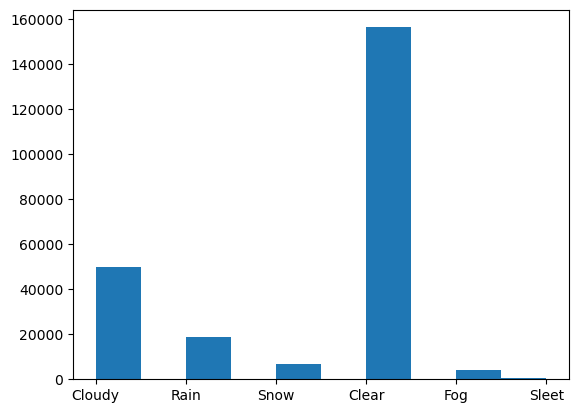

In [16]:
plt.hist(df['Weather Condition'])
plt.show()

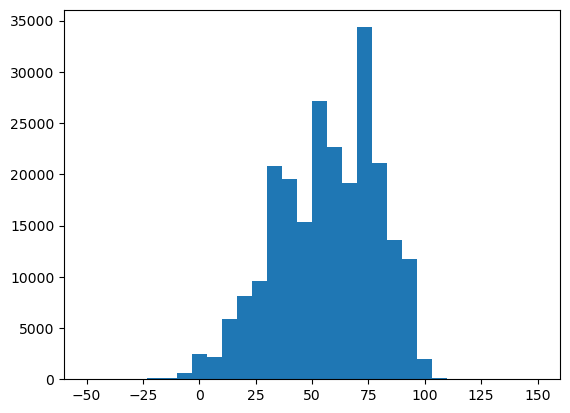

In [17]:
plt.hist(df['Temperature'], bins = 30, range=[-50,150])
plt.show()

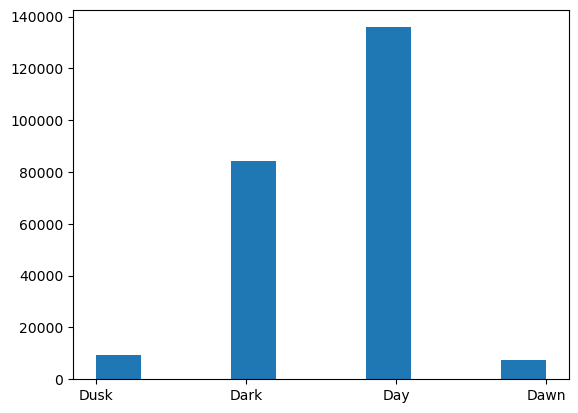

In [18]:
plt.hist(df['Visibility'])
plt.show()

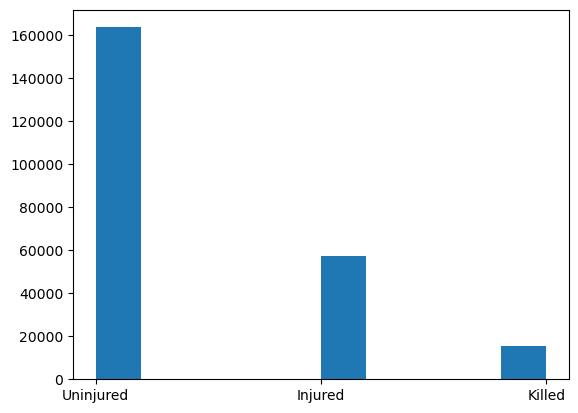

In [19]:
plt.hist(df['Driver Condition'])
plt.show()

## Extract Data

In [20]:
temp = df[['Temperature','Driver Condition Code']].dropna()
wea = df[['Weather Condition Code','Driver Condition Code']].dropna()
vis = df[['Visibility Code','Driver Condition Code']].dropna()

temp_count = temp.iloc[:,[0]].groupby(["Temperature"]).size().reset_index(name="Number of Accidents")
wea_count = wea.iloc[:,[0]].groupby(["Weather Condition Code"]).size().reset_index(name="Number of Accidents")
vis_count = vis.iloc[:,[0]].groupby(["Visibility Code"]).size().reset_index(name="Number of Accidents")

Weather Condition:
- 1.0: clear          
- 2.0: cloudy          
- 3.0: rain          
- 4.0: fog         
- 5.0: sleet        
- 6.0: snow

Visibility:
- 1.0: Dawn
- 2.0: Day
- 3.0: Dusk
- 4.0: Dark

Driver Condition:
- 1.0: Killed
- 2.0: Injured
- 3.0: Uninjured

## KNeighbors

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import numpy as np
clf = KNeighborsClassifier(3)

### Temperature

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(temp.iloc[:,[0]], temp.iloc[:,[1]], test_size=0.8, random_state=111)

In [23]:
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

/Users/bangpham/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/bangpham/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [24]:
print (classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         1.0       0.07      0.06      0.06     12427
         2.0       0.24      0.22      0.23     46038
         3.0       0.69      0.73      0.71    130990

    accuracy                           0.56    189455
   macro avg       0.33      0.33      0.33    189455
weighted avg       0.54      0.56      0.55    189455



In [27]:
print(accuracy_score(Y_test, Y_pred))

0.559657966271674


### Weather 

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(wea.iloc[:,[0]], wea.iloc[:,[1]], test_size=0.8, random_state=111)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print (classification_report(Y_test, Y_pred))

/Users/bangpham/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/bangpham/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score   support

         1.0       0.06      0.21      0.10     12427
         2.0       0.25      0.69      0.36     46038
         3.0       0.73      0.12      0.20    130990

    accuracy                           0.26    189455
   macro avg       0.35      0.34      0.22    189455
weighted avg       0.57      0.26      0.23    189455



In [29]:
print(accuracy_score(Y_test, Y_pred))

0.26159246259006097


### Visibility

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(vis.iloc[:,[0]], vis.iloc[:,[1]], test_size=0.8, random_state=111)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print (classification_report(Y_test, Y_pred))

/Users/bangpham/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/bangpham/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/bangpham/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-define

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00     12427
         2.0       0.25      0.59      0.35     46038
         3.0       0.71      0.44      0.54    130990

    accuracy                           0.44    189455
   macro avg       0.32      0.34      0.30    189455
weighted avg       0.55      0.44      0.46    189455



/Users/bangpham/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
print(accuracy_score(Y_test, Y_pred))

0.4446596817186139


## Naive Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

### Temperature

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(temp.iloc[:,[0]], temp.iloc[:,[1]], test_size=0.8, random_state=111)

clf = GaussianNB().fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print (classification_report(Y_test, Y_pred))

/Users/bangpham/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/bangpham/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00     12427
         2.0       0.18      0.00      0.00     46038
         3.0       0.69      1.00      0.82    130990

    accuracy                           0.69    189455
   macro avg       0.29      0.33      0.27    189455
weighted avg       0.52      0.69      0.57    189455



/Users/bangpham/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bangpham/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
print(accuracy_score(Y_test, Y_pred))

0.691330395080626


### Weather

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(wea.iloc[:,[0]], wea.iloc[:,[1]], test_size=0.8, random_state=222)

clf = MultinomialNB().fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print (classification_report(Y_test, Y_pred))

/Users/bangpham/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/bangpham/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00     12419
         2.0       0.00      0.00      0.00     46024
         3.0       0.69      1.00      0.82    131012

    accuracy                           0.69    189455
   macro avg       0.23      0.33      0.27    189455
weighted avg       0.48      0.69      0.57    189455



/Users/bangpham/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bangpham/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
print(accuracy_score(Y_test, Y_pred))

0.6915204138185849


### Visibility

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(vis.iloc[:,[0]], vis.iloc[:,[1]], test_size=0.8, random_state=333)

clf = MultinomialNB().fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print (classification_report(Y_test, Y_pred))

/Users/bangpham/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/bangpham/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00     12452
         2.0       0.00      0.00      0.00     46061
         3.0       0.69      1.00      0.82    130942

    accuracy                           0.69    189455
   macro avg       0.23      0.33      0.27    189455
weighted avg       0.48      0.69      0.56    189455



/Users/bangpham/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bangpham/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
print(accuracy_score(Y_test, Y_pred))

0.6911509329392204


## Linear SVC

In [39]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC

### Temperature

In [40]:
X_train, X_test, y_train, y_test = train_test_split(temp.iloc[:,[0]], temp.iloc[:,[1]], random_state=111)
hypothesis = LinearSVC(dual=False)
scores = cross_val_score(hypothesis, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1)
print ("LinearSVC -> cross validation accuracy: mean = %0.3f std = %0.3f" % (np.mean(scores), np.std(scores)))

/Users/bangpham/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/bangpham/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/bangpham/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVC -> cross validation accuracy: mean = 0.692 std = 0.000


### Weather

In [41]:
X_train, X_test, y_train, y_test = train_test_split(wea.iloc[:,[0]], wea.iloc[:,[1]], random_state=111)
hypothesis = LinearSVC(dual=False)
scores = cross_val_score(hypothesis, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1)
print ("LinearSVC -> cross validation accuracy: mean = %0.3f std = %0.3f" % (np.mean(scores), np.std(scores)))

/Users/bangpham/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVC -> cross validation accuracy: mean = 0.692 std = 0.000


/Users/bangpham/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/bangpham/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Visibility

In [43]:
X_train, X_test, y_train, y_test = train_test_split(vis.iloc[:,[0]], vis.iloc[:,[1]], random_state=111)
hypothesis = LinearSVC(dual=False)
scores = cross_val_score(hypothesis, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1)
print ("LinearSVC -> cross validation accuracy: mean = %0.3f std = %0.3f" % (np.mean(scores), np.std(scores)))

/Users/bangpham/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/bangpham/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/bangpham/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVC -> cross validation accuracy: mean = 0.692 std = 0.000


## Visualization

### Weather

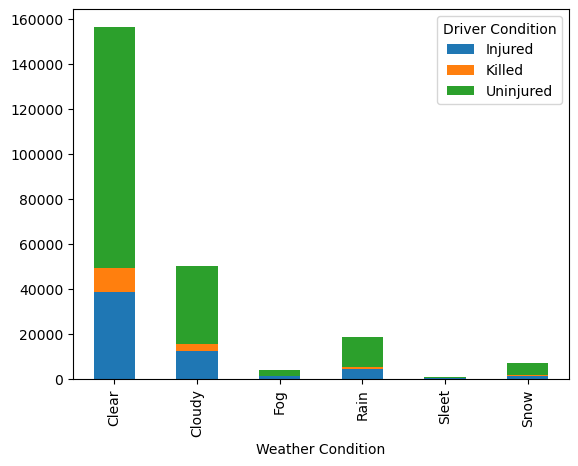

In [44]:
wea = df[['Weather Condition','Driver Condition']]
wea.pivot_table(index='Weather Condition', columns='Driver Condition', aggfunc='size').plot.bar(stacked=True)
plt.show()

### Visualization

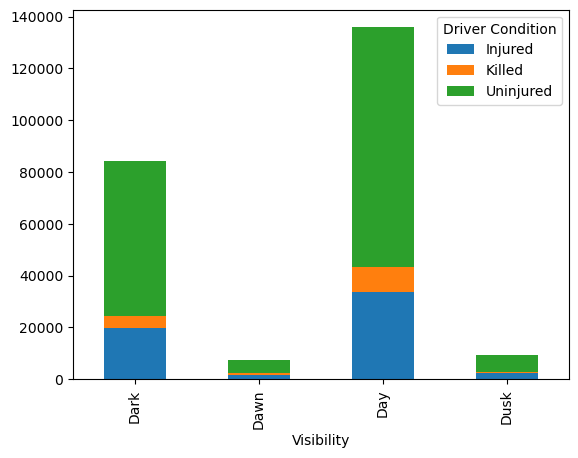

In [45]:
vis = df[['Visibility','Driver Condition']]
vis.pivot_table(index='Visibility', columns='Driver Condition', aggfunc='size').plot.bar(stacked=True)
plt.show()

### Temperature

Text(0, 0.5, 'Number of Accidents')

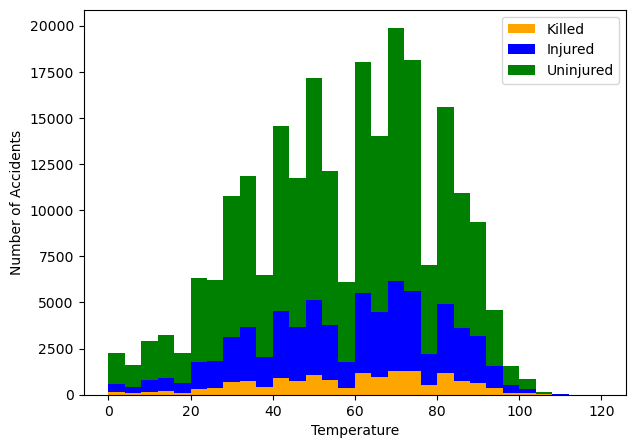

In [46]:
import matplotlib
%matplotlib inline
 
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.dpi'] = 100
 
from IPython.core.pylabtools import figsize
 
figsize(7, 5)
 
# Create list of data according to different accessibility index
#
x1 = list(temp[temp['Driver Condition Code'] == 1.0]['Temperature'])
x2 = list(temp[temp['Driver Condition Code'] == 2.0]['Temperature'])
x3 = list(temp[temp['Driver Condition Code'] == 3.0]['Temperature'])
 
# Setting colors and names
#
colors=['orange', 'blue', 'green']
names=['Killed', 'Injured', 'Uninjured']
 
# Creating plot with list values, colors and names (labels)
# Note the density value set as true which represents the
# probability distribution
# Note the parameter stacked = True which results in stacked histogram plot
#
plt.hist([x1, x2, x3], color=colors, label=names, density=False, stacked = True, range = [0,120], bins=30)
 
# Set the legend and labels
#
plt.legend()
plt.xlabel('Temperature')
plt.ylabel('Number of Accidents')